#Gaussian naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Social_Network_Ads (1).csv')

df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b27929df0>,
      dtype=object)

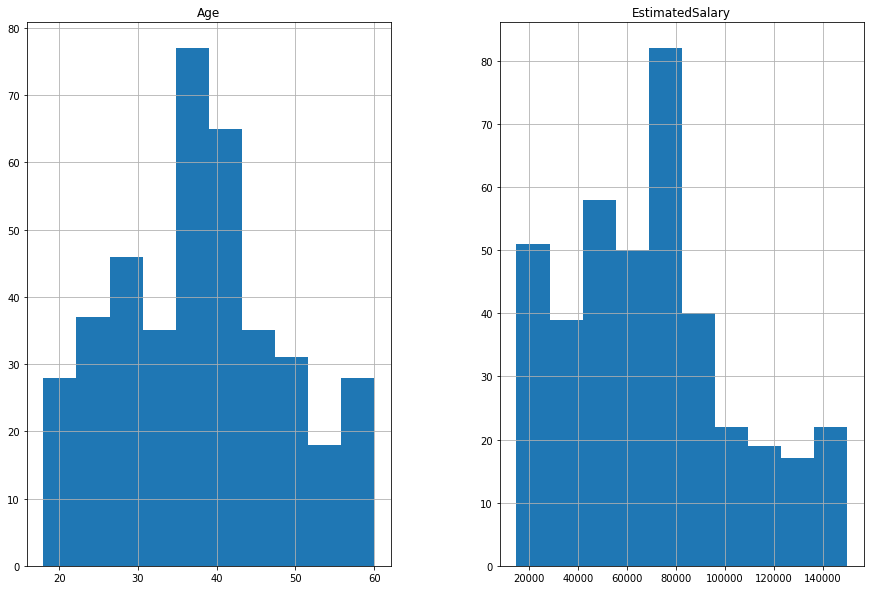

In [ ]:
df[["Age", "EstimatedSalary"]].hist(figsize=(15, 10))

## Predict with values

In [ ]:
feature_a = df['Age'].values
feature_e = df['EstimatedSalary'].values

In [ ]:
X = df.iloc[:, :-1].values
print(X)

In [ ]:
y = df.iloc[:, -1].values
y

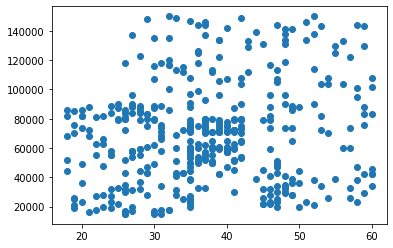

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(feature_a, feature_e)
plt.show()

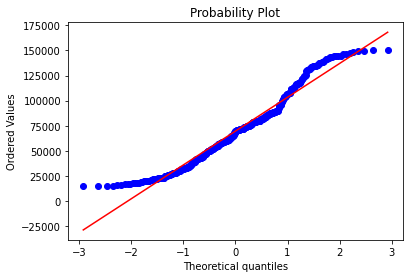

In [ ]:
import numpy as np
import pylab
import scipy.stats as stats

stats.probplot(feature_e, dist="norm", plot=pylab)
pylab.show()

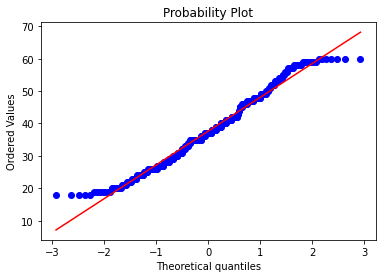

In [ ]:
stats.probplot(feature_a, dist="norm", plot=pylab)
pylab.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='weighted')


In [ ]:
print("Accuracy: ", acc)
print("Precision: ", precision)
print("Recall: ",recall )
print("F1-Score: ", f1)

Accuracy:  0.9
Precision:  0.8861985472154963
Recall:  0.9
F1-Score:  0.8985893416927899


##Predict with dataframe




In [ ]:
X_df = df[["Age", "EstimatedSalary"]]
y_df = df["Purchased"]
X_df.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [ ]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.2, shuffle=True)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_df, y_train_df)
y_df_pred = gnb.predict(X_test_df)

In [ ]:
print(accuracy_score(y_test_df, y_df_pred))
print(precision_score(y_test_df, y_df_pred))
print(recall_score(y_test_df, y_df_pred))
print(f1_score(y_test_df, y_df_pred))

0.9
0.88
0.8148148148148148
0.8461538461538461


#ROC

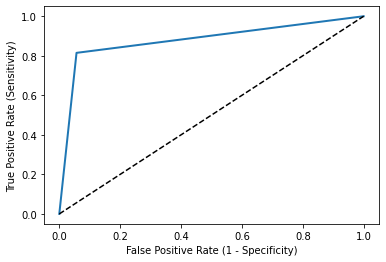

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test_df, y_df_pred)
plt.figure(figsize=(6,4))

plt.plot(fpr_gnb, tpr_gnb, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

# plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#Confusion Matrix

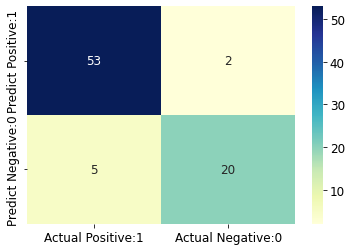

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_df, y_df_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#Barchart

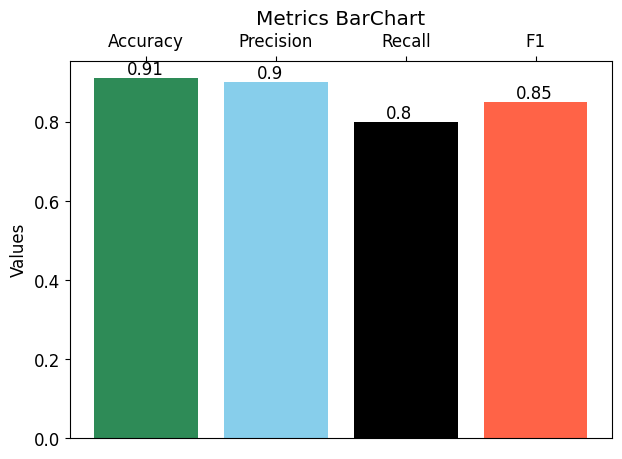

In [ ]:
x=['Accuracy', 'Precision', 'Recall', 'F1']
y = [0.91, 0.90, 0.80, 0.85]

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
xlocs, xlabs = plt.xticks()
xlocs=[i+0.1 for i in range(0,10)]
plt.bar(x,y, color=[ 'seagreen', 'skyblue', 'black', 'tomato'])
plt.ylabel("Values")
plt.title('Metrics BarChart')
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))
plt.show()

#ROC AUC

In [ ]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test_df, y_df_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8818


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5,
                                    n_repeats=3,
                                    random_state=999)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gnb,
                     param_grid=params_NB,
                     cv=cv_method,
                     verbose=1,
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [ ]:
gs_NB.best_params_

{'var_smoothing': 0.02848035868435802}

#Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train_df,y_train_df)

RandomForestClassifier()

In [ ]:
y_pred_r=clf.predict(X_test_df)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_df, y_pred_r))
print("Precision:", metrics.precision_score(y_test_df, y_pred_r))
print("Recall:", metrics.recall_score(y_test_df, y_pred_r))
print("F1:", metrics.f1_score(y_test_df, y_pred_r))

Accuracy: 0.8625
Precision: 0.7666666666666667
Recall: 0.8518518518518519
F1: 0.8070175438596491


In [ ]:
print(clf.predict([[49, 36000]]))

[1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
feature_names = []
for col in X_df.columns:
  feature_names.append(col)

In [ ]:
print(feature_names)

['Age', 'EstimatedSalary']
